In [1]:
from dotenv import load_dotenv
import os
import warnings
warnings.filterwarnings('ignore')

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler

In [2]:
load_dotenv()

True

In [3]:
user=os.getenv('client')
password=os.getenv('secret')

In [4]:
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=user, client_secret=password))

In [5]:
import getpass
hola=getpass.getpass('Dime tu contraseña')

In [6]:
results=sp.search(q='artist:Rosalía', limit=50)

In [7]:
#results['tracks']['items'][1]['name']

In [8]:
results['tracks']['items'][1]['id']

'53tfEupEzQRtVFOeZvk7xq'

In [9]:
tracks_id=[i['id'] for i in results['tracks']['items']]

In [10]:
#results['tracks']['total']

In [11]:
tracks_id

['609E1JCInJncactoMmkDon',
 '53tfEupEzQRtVFOeZvk7xq',
 '6Y46tOTRhkBamosyuWa6YX',
 '2qG5sZ7Si6sdK74qLxedYM',
 '5ildQOEKmJuWGl2vRkFdYc',
 '7BlBVFwvbWvcwNcUarQmjk',
 '4kXxEhuatrvwrTQycA7s9B',
 '4w47S36wQGBhGg073q3nt7',
 '3Eax1yebRxj6LSYpxE9Yd3',
 '5gCNf9wMVrYuM2fvfgLTlF',
 '2FYGZDfsAnNsrm1gVbyKnG',
 '1B0BQaSRHxhI0AUlItY3LK',
 '1HII0EIufOG0nGpWCQixbO',
 '2SiAcexM2p1yX6joESbehd',
 '70AYiGbc4mWZGEqiipBBDb',
 '3VjCEyc0bHfa4Ie34kbWyb',
 '6hH6QJ9ZAO0Z6m7PfvLoXW',
 '75rqqKvzJCGv2oq9C4yFDt',
 '6ygEPi8EtVkUO0Xarcgs63',
 '23zJcKwLf5CeaKVbFhrWgF',
 '5r8mGKhCDIVWb3AG4hm0l0',
 '2Sfl7odHUmG7qc8SbqUyzE',
 '4CD623yLJVvKJxUyzaTqtC',
 '4kroNlz8BTfswE4M0i3YCh',
 '1zZ7vl1amOLI4GE5oUn0YB',
 '7MDfNYdpdohHjmFsYK44KU',
 '4QlMiL1BPCBzLfn1XbSkpg',
 '2reL9PAUza4PUtbjqW1fRf',
 '7dQFpbs34ufIEU745DVclf',
 '6lKZ5I0yW3IpUFHEKJCWlx',
 '6HpgdL4zUpuyXCzvAhgR5a',
 '2K3bjojp1sCLdMMoO5lJ2p',
 '5tmrMIajDQRBcJQPaoAGdk',
 '3BQPPsoxlhuSIEPlNRHHZt',
 '4n1WwhKzKHUX598tvU1wMu',
 '77VjuBo3CJbamC3gzaUzK9',
 '0RhO0RV0YKyF05kZ4uQOHW',
 

In [12]:
#Elijo la primer track_id
sp.audio_features('609E1JCInJncactoMmkDon')

[{'danceability': 0.768,
  'energy': 0.644,
  'key': 5,
  'loudness': -6.671,
  'mode': 0,
  'speechiness': 0.136,
  'acousticness': 0.736,
  'instrumentalness': 0.000837,
  'liveness': 0.173,
  'valence': 0.53,
  'tempo': 95.05,
  'type': 'audio_features',
  'id': '609E1JCInJncactoMmkDon',
  'uri': 'spotify:track:609E1JCInJncactoMmkDon',
  'track_href': 'https://api.spotify.com/v1/tracks/609E1JCInJncactoMmkDon',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/609E1JCInJncactoMmkDon',
  'duration_ms': 194543,
  'time_signature': 4}]

In [13]:
audio_features=sp.audio_features(tracks_id)

In [14]:
audio_features

[{'danceability': 0.768,
  'energy': 0.644,
  'key': 5,
  'loudness': -6.671,
  'mode': 0,
  'speechiness': 0.136,
  'acousticness': 0.736,
  'instrumentalness': 0.000837,
  'liveness': 0.173,
  'valence': 0.53,
  'tempo': 95.05,
  'type': 'audio_features',
  'id': '609E1JCInJncactoMmkDon',
  'uri': 'spotify:track:609E1JCInJncactoMmkDon',
  'track_href': 'https://api.spotify.com/v1/tracks/609E1JCInJncactoMmkDon',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/609E1JCInJncactoMmkDon',
  'duration_ms': 194543,
  'time_signature': 4},
 {'danceability': 0.914,
  'energy': 0.622,
  'key': 7,
  'loudness': -6.538,
  'mode': 1,
  'speechiness': 0.0892,
  'acousticness': 0.146,
  'instrumentalness': 1.68e-05,
  'liveness': 0.0632,
  'valence': 0.77,
  'tempo': 130.04,
  'type': 'audio_features',
  'id': '53tfEupEzQRtVFOeZvk7xq',
  'uri': 'spotify:track:53tfEupEzQRtVFOeZvk7xq',
  'track_href': 'https://api.spotify.com/v1/tracks/53tfEupEzQRtVFOeZvk7xq',
  'analysis_url': 'https://a

In [15]:
df=pd.DataFrame(audio_features)

In [16]:
df.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
22,0.954,0.582,9,-5.744,0,0.0727,0.235,0.000001,0.0572,0.884,130.008,audio_features,4CD623yLJVvKJxUyzaTqtC,spotify:track:4CD623yLJVvKJxUyzaTqtC,https://api.spotify.com/v1/tracks/4CD623yLJVvK...,https://api.spotify.com/v1/audio-analysis/4CD6...,170828,4


In [17]:
def get_audio_features(artist):
    results=sp.search(q=f'artist:{artist}', limit=50)
    tracks_id=[track['id'] for track in results['tracks']['items']]
    song_names=[track['name'] for track in results['tracks']['items']]

    audio_features=sp.audio_features(tracks_id)
    df=pd.DataFrame(audio_features)
    df['artist']=artist
    df['song_name']=song_names
    return df

In [18]:
get_audio_features('Red Hot Chili Peppers').head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song_name
0,0.618,0.938,9,-3.442,1,0.0456,0.0179,0.000000,0.167,0.875,91.455,audio_features,3ZOEytgrvLwQaqXreDs2Jx,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,https://api.spotify.com/v1/tracks/3ZOEytgrvLwQ...,https://api.spotify.com/v1/audio-analysis/3ZOE...,269000,4,Red Hot Chili Peppers,Can't Stop
1,0.595,0.717,0,-4.803,1,0.0295,0.0779,0.002740,0.108,0.547,88.969,audio_features,1G391cbiT3v3Cywg8T7DM1,spotify:track:1G391cbiT3v3Cywg8T7DM1,https://api.spotify.com/v1/tracks/1G391cbiT3v3...,https://api.spotify.com/v1/audio-analysis/1G39...,215907,4,Red Hot Chili Peppers,Scar Tissue
2,0.559,0.345,4,-13.496,1,0.0459,0.0576,0.000105,0.141,0.458,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4,Red Hot Chili Peppers,Under the Bridge
3,0.592,0.767,9,-2.788,0,0.0270,0.0021,0.001650,0.127,0.328,96.483,audio_features,48UPSzbZjgc449aqz8bxox,spotify:track:48UPSzbZjgc449aqz8bxox,https://api.spotify.com/v1/tracks/48UPSzbZjgc4...,https://api.spotify.com/v1/audio-analysis/48UP...,329733,4,Red Hot Chili Peppers,Californication
4,0.427,0.900,11,-3.674,1,0.0499,0.1160,0.000017,0.119,0.599,104.655,audio_features,2aibwv5hGXSgw7Yru8IYTO,spotify:track:2aibwv5hGXSgw7Yru8IYTO,https://api.spotify.com/v1/tracks/2aibwv5hGXSg...,https://api.spotify.com/v1/audio-analysis/2aib...,334667,4,Red Hot Chili Peppers,Snow (Hey Oh)


In [19]:
df=get_audio_features('Red Hot Chili Peppers')

Quiero hacer tracks de las canciones. veremos las columnas de interés

In [20]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'artist', 'song_name'],
      dtype='object')

In [21]:
x=df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler=StandardScaler()
x_prep=scaler.fit_transform(x)

In [22]:
K=range(2, 20)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

inertia

[489.8198726986007,
 434.7728308574099,
 354.5959498380465,
 350.85329813334215,
 314.98980944459913,
 257.8778471349014,
 239.19358179516286,
 228.7671401047263,
 207.06099807515412,
 192.32051349023305,
 180.57428722954856,
 155.79840560376218,
 148.81396884784286,
 137.10644144714865,
 120.45548513021349,
 115.79487989369103,
 104.89566809118247,
 99.61937014556739]

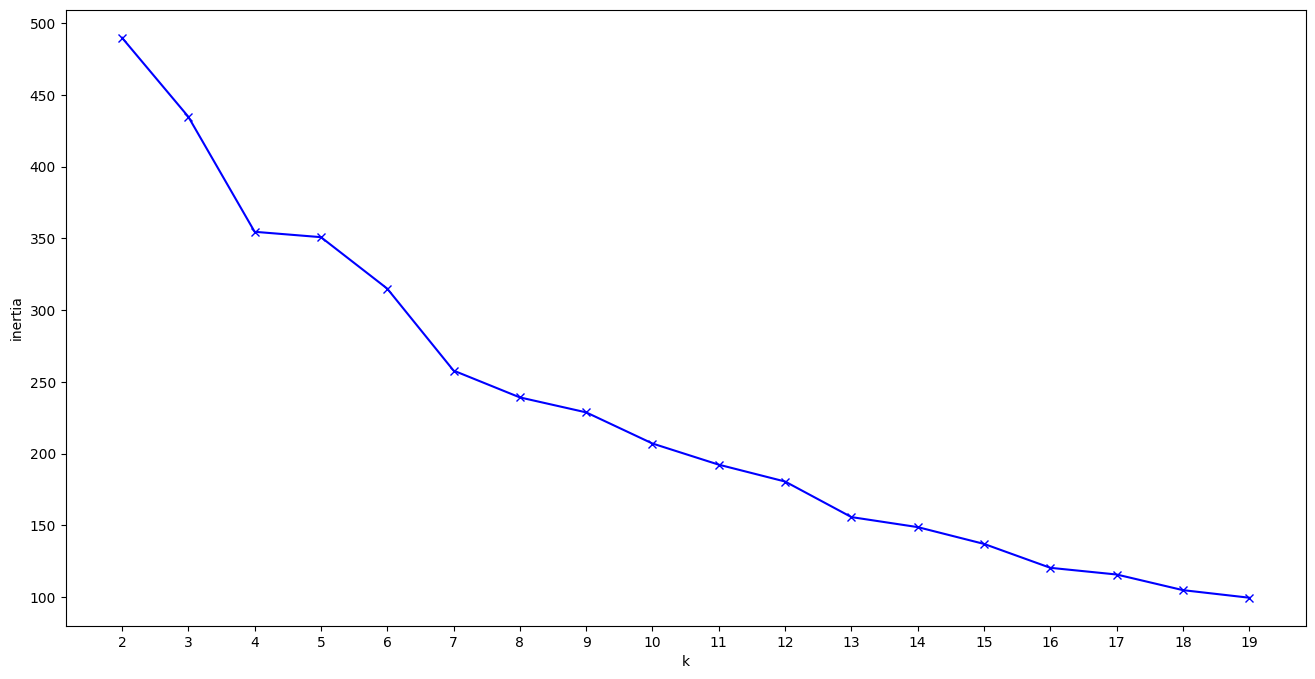

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

A todos los alumnos nos dan codos diferentes por elegir diferentes artitas. En mi caso el codo se daría en k=9. Sin embargo, en la clase decidimos elegir un k que sea igual para todos los alumnos. Elegimos k=9, es decir, 9 clusters

In [24]:
kmeans=KMeans(n_clusters=9, random_state=42)
kmeans.fit(x_prep)
clusters=kmeans.predict(x_prep)

In [25]:
clusters

array([1, 6, 5, 4, 4, 2, 6, 1, 5, 6, 4, 0, 4, 3, 3, 1, 3, 4, 0, 4, 2, 3,
       6, 2, 7, 6, 6, 4, 3, 4, 6, 5, 8, 2, 4, 5, 7, 1, 7, 3, 5, 3, 1, 6,
       4, 2, 6, 6, 2, 4])

In [26]:
scaled_df=pd.DataFrame(x_prep, columns=x.columns)
scaled_df['song_name']=df['song_name']
scaled_df['artist']=df['artist']
scaled_df['cluster']=clusters

In [27]:
scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name,artist,cluster
0,0.698282,1.039750,1.210921,0.687055,0.717741,-0.237777,-0.473139,-0.314744,0.037927,1.950878,-1.050346,Can't Stop,Red Hot Chili Peppers,1
1,0.511228,-0.121483,-1.210921,0.232492,0.717741,-0.668107,0.222702,-0.293422,-0.585041,0.330687,-1.142419,Scar Tissue,Red Hot Chili Peppers,6
2,0.218447,-2.076136,-0.134547,-2.670899,0.717741,-0.229759,-0.012724,-0.313927,-0.236601,-0.108938,-1.304935,Under the Bridge,Red Hot Chili Peppers,5
3,0.486830,0.141239,1.210921,0.905485,-1.393261,-0.734929,-0.656377,-0.301904,-0.384424,-0.751087,-0.864126,Californication,Red Hot Chili Peppers,4
4,-0.855083,0.840081,1.749108,0.609569,0.717741,-0.122844,0.664561,-0.314608,-0.468894,0.587546,-0.561464,Snow (Hey Oh),Red Hot Chili Peppers,4


In [28]:
scaled_df[scaled_df.song_name=="Can't Stop"]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name,artist,cluster
0,0.698282,1.03975,1.210921,0.687055,0.717741,-0.237777,-0.473139,-0.314744,0.037927,1.950878,-1.050346,Can't Stop,Red Hot Chili Peppers,1


In [29]:
scaled_df[scaled_df.cluster==3]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name,artist,cluster
13,-0.456575,1.255182,-0.134547,0.665679,-1.393261,2.071571,-0.664495,-0.258016,-0.728640,-0.316402,0.762556,Higher Ground - Remastered 2003,Red Hot Chili Peppers,3
14,-1.782222,0.067677,-0.134547,0.527073,-1.393261,-0.694836,-0.317735,-0.314727,-0.226042,0.167680,2.108612,Wet Sand,Red Hot Chili Peppers,3
16,0.478697,0.283109,-0.134547,-0.145587,-1.393261,0.387671,1.441583,-0.314744,1.357775,1.950878,1.042922,Sick Love,Red Hot Chili Peppers,3
21,-1.497574,-0.284371,0.941827,-2.421073,-1.393261,-0.603959,-0.410513,-0.294823,-0.194366,0.765372,2.172241,Breaking the Girl,Red Hot Chili Peppers,3
28,-0.269521,-0.184536,1.210921,-0.032364,-1.393261,0.331541,-0.634458,-0.314673,-0.627276,-0.593019,0.151638,Don't Forget Me,Red Hot Chili Peppers,3
39,-1.359316,0.335654,1.210921,-0.141245,-1.393261,1.349900,0.525393,-0.314232,-0.141572,0.478875,1.917837,Goodbye Angels,Red Hot Chili Peppers,3
41,-0.066201,1.081785,1.749108,0.807626,-1.393261,-0.400822,-0.661828,-0.314744,0.829836,0.656701,-0.024397,Fortune Faded,Red Hot Chili Peppers,3


In [30]:
song_name=input("Choose a song:")

results=sp.search(q=f'track: {song_name}', limit=1)
track_id=results["tracks"]["items"][0]["id"]

audio_features=sp.audio_features(track_id)
df_=pd.DataFrame(audio_features)

new_features=df_[x.columns]
scaled_x=scaler.transform(new_features)
cluster=kmeans.predict(scaled_x)

filtered_df=scaled_df[scaled_df["cluster"]==cluster[0]][x.columns]
closest, _=pairwise_distances_argmin_min(scaled_x, filtered_df)
scaled_df.loc[closest[0]]["song_name"], scaled_df.loc[closest[0]]["artist"]

('Under the Bridge', 'Red Hot Chili Peppers')

In [31]:
df_

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.463,0.293,4,-15.645,1,0.0357,0.699,0.000021,0.118,0.595,175.931,audio_features,5nZv1nb8T2oSt5hj7XLJ11,spotify:track:5nZv1nb8T2oSt5hj7XLJ11,https://api.spotify.com/v1/tracks/5nZv1nb8T2oS...,https://api.spotify.com/v1/audio-analysis/5nZv...,259027,3


#### Importamos la función que Escrapea el top 100 Billboard y devuelve un dataframe de las canciones con sus artistas

In [32]:
from scrap_billboard import scrap

In [33]:
scrap()

,song,artist
0,I Had Some Help,Post Malone Featuring Morgan Wallen
1,Not Like Us,Kendrick Lamar
2,Million Dollar Baby,Tommy Richman
3,A Bar Song (Tipsy),Shaboozey
4,Espresso,Sabrina Carpenter
...,...,...
95,Attitude,Don Toliver Featuring Charlie Wilson & Cash Co...
96,Heat Stick,Shoreline Mafia Presents OhGeesy & Fenix Flexin
97,The Alchemy,Taylor Swift
98,On One Tonight,Gunna
